In [1]:
#!pip install -U scikit-learn
#!pip install -U imbalanced-learn


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# Load the data direct from GitHub
df = pd.read_csv('heart_2022_with_nans.csv')
df.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          NaN             No  ...            NaN   
1         6.0          NaN             No  ...           1.60   
2         5.0          NaN             No  ...           1.57   
3         7.0          NaN             No  ...           1.65   
4         9.0          NaN             No  ...           1.57   

  WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0               NaN    NaN              No         No          Yes   
1             68.04  26.57              No         No           No   
2             63.50  25.61              No         No           No   
3             63.50  23.30              No         No          Yes   
4             53.98  21.77             Yes         No           No   

  PneumoVaxEver                                  TetanusLast10Tdap  \
0            No  Yes, received tetanus shot but not sure what type   
1            No  No, did not receive any tetanus shot in the pa...   
2            No                                                NaN   
3           Yes  No, did not receive any tetanus shot in the pa...   
4           Yes  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear CovidPos  
0               No       No  
1               No       No  
2               No      Yes  
3               No       No  
4               No       No  

[5 rows x 40 columns]

In [3]:
df = df.drop('State',axis =1)

We are dropping the 'State' column from the DataFrame `df` using the `drop` method with `axis=1` as the state has no relationship with the health of the person and there are better metrics in our dataset.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        445132 non-null  object 
 1   GeneralHealth              443934 non-null  object 
 2   PhysicalHealthDays         434205 non-null  float64
 3   MentalHealthDays           436065 non-null  float64
 4   LastCheckupTime            436824 non-null  object 
 5   PhysicalActivities         444039 non-null  object 
 6   SleepHours                 439679 non-null  float64
 7   RemovedTeeth               433772 non-null  object 
 8   HadHeartAttack             442067 non-null  object 
 9   HadAngina                  440727 non-null  object 
 10  HadStroke                  443575 non-null  object 
 11  HadAsthma                  443359 non-null  object 
 12  HadSkinCancer              441989 non-null  object 
 13  HadCOPD                    44

This DataFrame contains 445,132 entries and has a total of 39 columns. Here is a summary of the columns:

1. `Sex`: The gender of the individual.

2. `GeneralHealth`: The general health status of the individual.

3. `PhysicalHealthDays`: The number of days the individual experienced physical health issues.

4. `MentalHealthDays`: The number of days the individual experienced mental health issues.

5. `LastCheckupTime`: The time of the last medical checkup for the individual.

6. `PhysicalActivities`: Information about the individual's engagement in physical activities.

7. `SleepHours`: The average number of hours the individual sleeps.

8. `RemovedTeeth`: Whether the individual has had teeth removed.

9. `HadHeartAttack`: Whether the individual has had a heart attack.

10. `HadAngina`: Whether the individual has had angina.

11. `HadStroke`: Whether the individual has had a stroke.

12. `HadAsthma`: Whether the individual has had asthma.

13. `HadSkinCancer`: Whether the individual has had skin cancer.

14. `HadCOPD`: Whether the individual has had Chronic Obstructive Pulmonary Disease (COPD).

15. `HadDepressiveDisorder`: Whether the individual has had a depressive disorder.

16. `HadKidneyDisease`: Whether the individual has had kidney disease.

17. `HadArthritis`: Whether the individual has had arthritis.

18. `HadDiabetes`: Whether the individual has diabetes.

19. `DeafOrHardOfHearing`: Whether the individual is deaf or hard of hearing.

20. `BlindOrVisionDifficulty`: Whether the individual has blindness or vision difficulties.

21. `DifficultyConcentrating`: Whether the individual experiences difficulty concentrating.

22. `DifficultyWalking`: Whether the individual experiences difficulty walking.

23. `DifficultyDressingBathing`: Whether the individual experiences difficulty with dressing and bathing.

24. `DifficultyErrands`: Whether the individual experiences difficulty running errands.

25. `SmokerStatus`: The smoking status of the individual.

26. `ECigaretteUsage`: Whether the individual uses e-cigarettes.

27. `ChestScan`: Information about chest scans.

28. `RaceEthnicityCategory`: The race and ethnicity category of the individual.

29. `AgeCategory`: The age category of the individual.

30. `HeightInMeters`: The height of the individual in meters.

31. `WeightInKilograms`: The weight of the individual in kilograms.

32. `BMI`: The Body Mass Index (BMI) of the individual.

33. `AlcoholDrinkers`: Whether the individual consumes alcohol.

34. `HIVTesting`: Whether the individual has been tested for HIV.

35. `FluVaxLast12`: Information about receiving a flu vaccine in the last 12 months.

36. `PneumoVaxEver`: Information about ever receiving a pneumococcal vaccine.

37. `TetanusLast10Tdap`: Information about the last tetanus vaccine, including Tdap.

38. `HighRiskLastYear`: Whether the individual was considered high risk in the last year.

39. `CovidPos`: Whether the individual tested positive for COVID-19.


In [5]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
float_columns = df.select_dtypes(include=['float']).columns.tolist()
print(float_columns)
print(object_columns)

['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']
['Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


We are separating the DataFrame `df` into two lists of columns based on data types.

1. `float_columns`: These columns contain float data types, typically representing numerical values with decimal points. This list includes:
   - `PhysicalHealthDays`
   - `MentalHealthDays`
   - `SleepHours`
   - `HeightInMeters`
   - `WeightInKilograms`
   - `BMI`

2. `object_columns`: These columns contain object data types, which often represent categorical or textual data. This list includes a variety of columns, such as:
   - `Sex`
   - `GeneralHealth`
   - `LastCheckupTime`
   - and many others, which contain information that is not numerical.


In [6]:
df.isnull().sum()

Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategory        14057
AgeCategory         

We are using the `isnull()` method to check for missing (null) values in the DataFrame `df`. The `sum()` function is then applied to count the number of missing values for each column.

The output represents the number of missing values in each column of the DataFrame, indicating how many values are not present for each feature.


In [7]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with the 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data (Assuming X is your data)
imputer.fit(df[float_columns])

# Transform the data by filling missing values with the mean
df[float_columns] = imputer.transform(df[float_columns])

In [8]:

# Create a SimpleImputer instance with the 'mean' strategy
imputer1 = SimpleImputer(strategy='most_frequent')

# Fit the imputer to your data (Assuming X is your data)
imputer1.fit(df[object_columns])

# Transform the data by filling missing values with the mean
df[object_columns] = imputer1.transform(df[object_columns])

This code replaces missing values in the selected float columns with the mean value for each respective column and  replaces missing values in the selected object columns with the most frequent value for each respective column. It's a common technique for handling missing numerical data.



In [9]:
df.isnull().sum()

Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholD

The df.isnull().sum() output shows that there are no missing values in the DataFrame. This means that all the missing values have been successfully imputed, and the DataFrame no longer contains any NaN or null values. This is an important step in data preprocessing to ensure that your data is ready for analysis or modeling.

All values in the DataFrame have zero missing values. (df.isnull().sum() - All columns have no missing data)


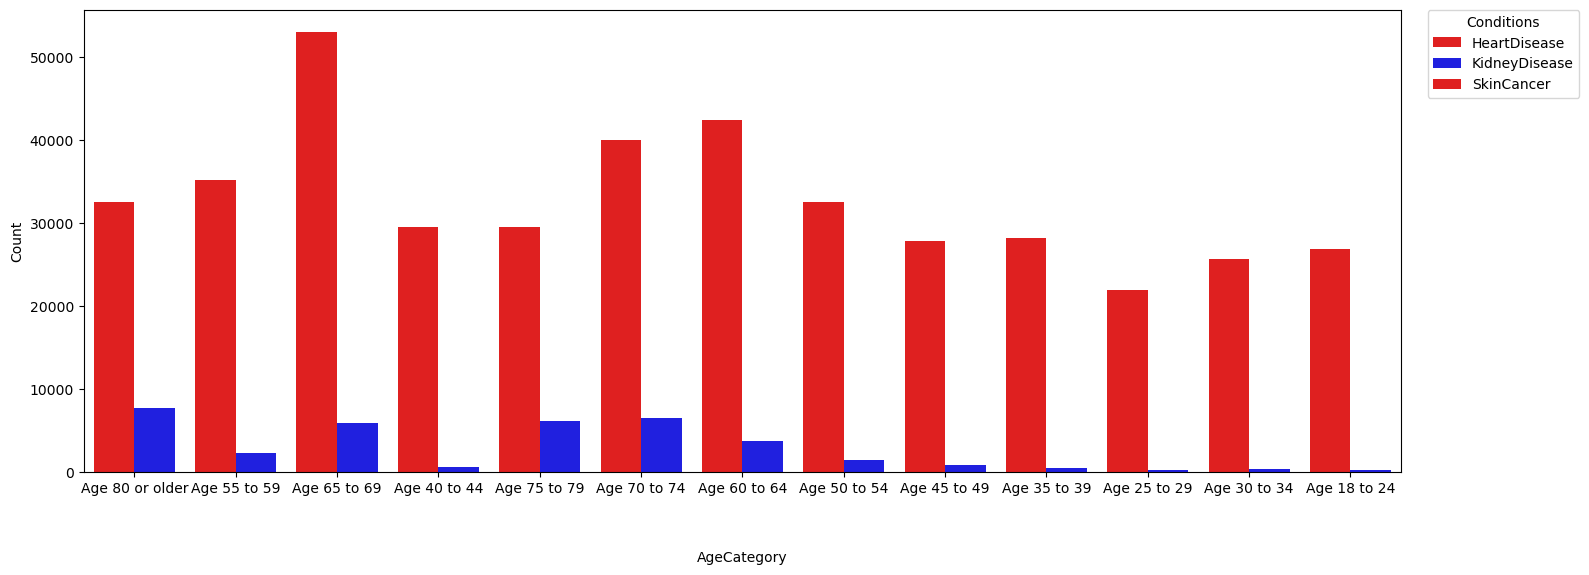

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
conditions = ['HadHeartAttack', 'HadKidneyDisease', 'HadSkinCancer']
colors = ['red', 'blue', 'orange']  # Use color names

labels = ['HeartDisease', 'KidneyDisease', 'SkinCancer']

fig, ax = plt.subplots(figsize=(17, 6))

for i, condition in enumerate(conditions):
    sns.countplot(data=df, x='AgeCategory', hue=condition, palette=colors, ax=ax)

ax.set_xlabel("AgeCategory",labelpad=40)
ax.set_ylabel("Count")
ax.legend(labels, title="Conditions", bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

We are using `matplotlib` and `seaborn` to create a countplot to visualize the distribution of specific medical conditions by age category in the DataFrame `df`.

1. Define the conditions, colors, and labels:
   - `conditions`: A list of conditions to visualize, including 'HadHeartAttack', 'HadKidneyDisease', and 'HadSkinCancer'.
   - `colors`: A list of colors for each condition.
   - `labels`: Descriptive labels for each condition.

2. Create a figure and axis for the plot:
   - `fig, ax = plt.subplots(figsize=(17, 6))`

3. Iterate through the conditions and create a countplot for each one, grouped by 'AgeCategory':
   - `for i, condition in enumerate(conditions):`
   - `sns.countplot(data=df, x='AgeCategory', hue=condition, palette=colors, ax=ax)`

4. Set labels and legend for the plot:
   - `ax.set_xlabel("AgeCategory", labelpad=40)`
   - `ax.set_ylabel("Count")`
   - `ax.legend(labels, title="Conditions", bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)`

5. Display the plot:
   - `plt.show()`

This code generates a grouped countplot, allowing you to visualize the distribution of specific medical conditions within different age categories, with each condition represented by a distinct color.


In [11]:
import plotly.graph_objects as go
import pandas as pd

categorical_features = ['GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack',
                        'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
                        'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
                        'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
                        'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers',
                        'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']

# Define colors for the pie charts
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

def create_pie_chart(df, variable, colours):
    labels = df[variable].value_counts().index
    values = df[variable].value_counts()

    fig = go.Figure(data=[go.Pie(
        labels=labels,
        values=values,
        hole=0.35,
        textinfo='label+percent',
        marker_colors=colours
    )])

    fig.update_layout(title=variable, showlegend=False)
    fig.show()

for variable in categorical_features:
    create_pie_chart(df, variable, colours)


We are using Plotly to generate pie charts for each categorical feature in the DataFrame.

1. Define the list of categorical features that you want to create pie charts for.
   - `categorical_features`: A list containing the names of categorical columns in your DataFrame.

2. Define the colors to be used for the pie chart segments.
   - `colours`: A list of color codes to represent different segments in the pie charts.

3. Create a function `create_pie_chart` that takes the DataFrame, a categorical feature, and the colors as input and generates a pie chart:
   - Extract unique labels and their counts from the selected categorical feature.
   - Create a Pie chart using Plotly with the labels, values, hole, and color settings.
   - Set the chart's title and disable the legend.

4. Loop through each categorical feature and call the `create_pie_chart` function to generate a pie chart for each feature:
   - `for variable in categorical_features:`

5. Display the pie charts using `fig.show()`.

This code produces individual pie charts for each categorical feature, visualizing the distribution of different categories within each feature.


In [12]:
female_with_heart_disease = len(df[(df['HadHeartAttack']=='Yes') & (df['Sex']=='Female')])
num_female = len(df[df['Sex']=='Female'])
male_with_heart_disease = len(df[(df['HadHeartAttack']=='Yes') & (df['Sex']=='Male')])
num_male = len(df[df['Sex']=='Male'])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

# Most heart disease patients are Male than Females

Probability of Male to have Heart disease: 0.07368129268444219
Probability of Female to have Heart disease: 0.041082185567185125


The provided code calculates and compares the probability of individuals having heart disease based on their gender using a DataFrame.

1. Probability of Male to have Heart disease: 7.37%
2. Probability of Female to have Heart disease: 4.11%

The code concludes that a higher percentage of heart disease patients in the dataset are male, with a probability of 7.37%, as opposed to females, where the probability is 4.11%.


In [13]:

df = pd.get_dummies(
    df, 
    prefix_sep='_', 
    dummy_na=False, 
    drop_first=True, 
    columns=object_columns, 
    dtype='int32'
)

df.head()

PhysicalHealthDays  MentalHealthDays  SleepHours  HeightInMeters  \
0                 0.0               0.0         8.0        1.702691   
1                 0.0               0.0         6.0        1.600000   
2                 2.0               3.0         5.0        1.570000   
3                 0.0               0.0         7.0        1.650000   
4                 2.0               0.0         9.0        1.570000   

   WeightInKilograms        BMI  Sex_Male  GeneralHealth_Fair  \
0           83.07447  28.529842         0                   0   
1           68.04000  26.570000         0                   0   
2           63.50000  25.610000         0                   0   
3           63.50000  23.300000         0                   0   
4           53.98000  21.770000         0                   1   

   GeneralHealth_Good  GeneralHealth_Poor  ...  AlcoholDrinkers_Yes  \
0                   0                   0  ...                    0   
1                   0                   0  ...                    0   
2                   0                   0  ...                    0   
3                   0                   0  ...                    0   
4                   0                   0  ...                    1   

   HIVTesting_Yes  FluVaxLast12_Yes  PneumoVaxEver_Yes  \
0               0                 1                  0   
1               0                 0                  0   
2               0                 0                  0   
3               0                 1                  1   
4               0                 0                  1   

   TetanusLast10Tdap_Yes, received Tdap  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   TetanusLast10Tdap_Yes, received tetanus shot but not sure what type  \
0                                                  1                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     

   TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap  \
0                                                  0            
1                                                  0            
2                                                  0            
3                                                  0            
4                                                  0            

   HighRiskLastYear_Yes  \
0                     0   
1                     0   
2                     0   
3                     0   
4                     0   

   CovidPos_Tested positive using home test without a health professional  \
0                                                  0                        
1                                                  0                        
2                                                  0                        
3                                                  0                        
4                                                  0                        

   CovidPos_Yes  
0             0  
1             0  
2             1  
3             0  
4             0  

[5 rows x 69 columns]


This code uses the `pd.get_dummies` function to one-hot encode categorical columns in the DataFrame `df`. It specifies options such as `prefix_sep`, `dummy_na`, `drop_first`, `columns`, and `dtype`. After applying one-hot encoding, the code displays the first few rows of the DataFrame using `df.head()`.


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 69 columns):
 #   Column                                                                   Non-Null Count   Dtype  
---  ------                                                                   --------------   -----  
 0   PhysicalHealthDays                                                       445132 non-null  float64
 1   MentalHealthDays                                                         445132 non-null  float64
 2   SleepHours                                                               445132 non-null  float64
 3   HeightInMeters                                                           445132 non-null  float64
 4   WeightInKilograms                                                        445132 non-null  float64
 5   BMI                                                                      445132 non-null  float64
 6   Sex_Male                                                    

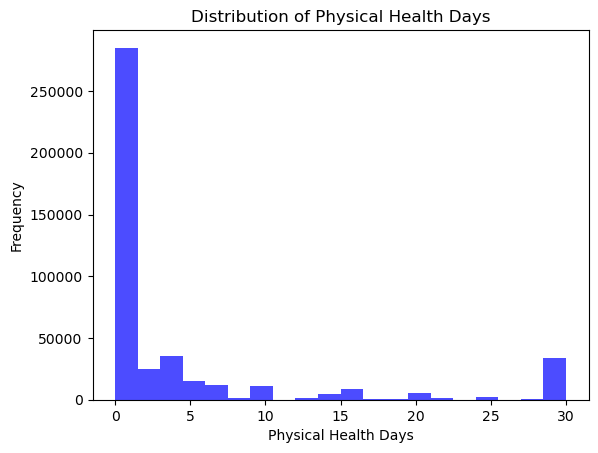

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset into a DataFrame (assuming you've already done this)
# df = pd.read_csv("your_dataset.csv")

# Create a histogram for the "PhysicalHealthDays" feature
plt.hist(df["PhysicalHealthDays"], bins=20, color='blue', alpha=0.7)
plt.xlabel("Physical Health Days")
plt.ylabel("Frequency")
plt.title("Distribution of Physical Health Days")
plt.show()


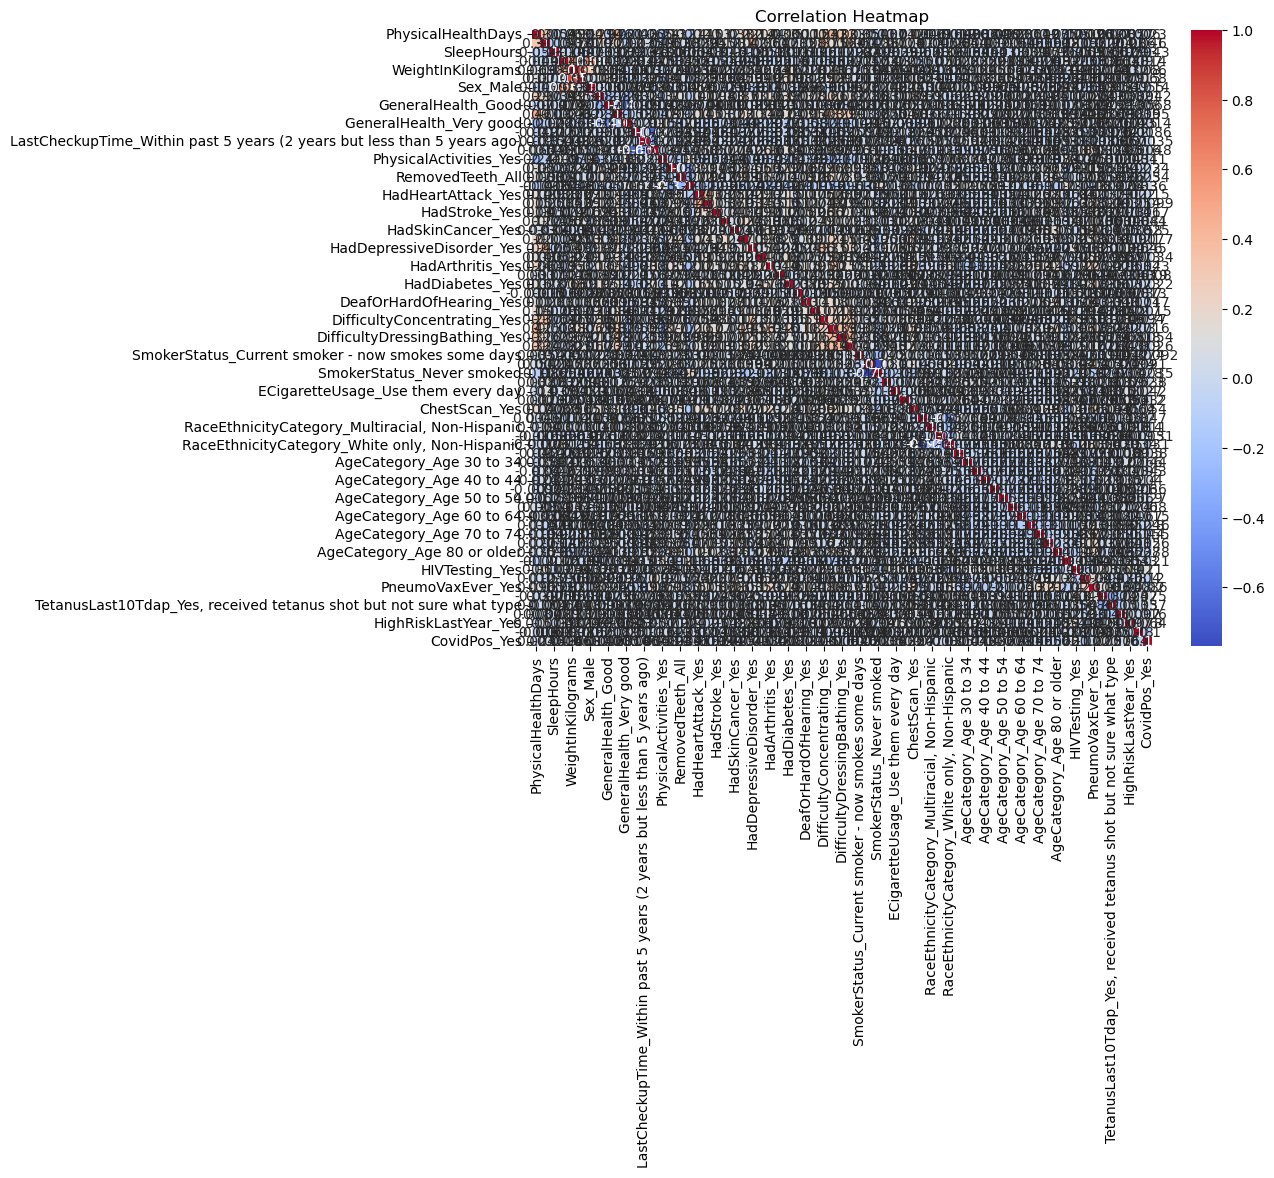

In [16]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()


This code calculates the correlation matrix for the DataFrame `df` and creates a heatmap to visualize the correlations between its columns. It uses the `cmap` parameter to set the color map to 'coolwarm' and displays the correlation values with the `annot` parameter set to `True`. Finally, it sets the title of the heatmap and shows the plot using `plt.show()`.


In [17]:
y = df['HadHeartAttack_Yes']
X=df.drop('HadHeartAttack_Yes',axis = 1)

In [18]:

sample_size = 4000
df1 = X[y==1].sample(n=sample_size, random_state=42)
df2 = X[y==0].sample(n=sample_size, random_state=42)
X = pd.concat([df1, df2], axis=0)   
y1 = y[y==1].sample(n=sample_size, random_state=42) 
y2 = y[y==0].sample(n=sample_size, random_state=42) 
y = pd.concat([y1, y2], axis=0)  

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



This code uses the `train_test_split` function from scikit-learn to split the data into training and testing sets. The `X` variable represents the feature data, and the `y` variable represents the target variable. The code specifies a test size of 20%, meaning that 20% of the data will be used for testing, and the remaining 80% will be used for training. The resulting sets are stored in `X_train`, `X_test`, `y_train`, and `y_test`.


In [20]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train,y_train = rus.fit_resample(X_train,y_train)


In [21]:
# Rescale the data using skleans standard scaler
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)




This code utilizes the `StandardScaler` from scikit-learn to standardize (scale) the feature data. It first creates a `StandardScaler` instance and then fits and transforms the training data (`X_train`) to have a mean of 0 and a standard deviation of 1. After that, it scales the testing data (`X_test`) using the same scaler to maintain consistency between the training and testing sets. Standardization is a common preprocessing step in machine learning to ensure that features have similar scales and do not introduce bias into the models.


In [22]:
print (X_train,y_train)

[[-0.13477936 -0.5393924  -0.03156063 ... -0.17937284  6.25707147
  -0.55925834]
 [ 0.34543407 -0.5393924   0.54031258 ... -0.17937284 -0.15981917
   1.7880824 ]
 [ 1.30586093 -0.5393924   0.54031258 ... -0.17937284 -0.15981917
  -0.55925834]
 ...
 [ 0.53751944  0.23124129  1.684059   ... -0.17937284 -0.15981917
   1.7880824 ]
 [ 2.26628779 -0.5393924  -1.17530706 ... -0.17937284 -0.15981917
  -0.55925834]
 [-0.19740701 -0.5393924  -0.60343385 ... -0.17937284 -0.15981917
  -0.55925834]] 145018    0
69848     0
84887     0
386731    0
443198    0
         ..
297868    1
152262    1
422587    1
347911    1
2252      1
Name: HadHeartAttack_Yes, Length: 6384, dtype: int32


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from scipy.stats import expon
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, recall_score
import tensorflow as tf
from tensorflow import keras
# Define hyperparameter grids for Randomized Search
y_prob1 ={}
param_grids_random = {
    "Logistic Regression": {
        'C': expon(scale=1),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    },
    "Decision Tree": {
        'max_depth': np.arange(1, 21),
        'min_samples_split': np.arange(2, 11),
        'min_samples_leaf': np.arange(1, 11),
        'max_features': ['auto', 'sqrt', 'log2']
    },
    "Random Forest": {
        'n_estimators': np.arange(100, 1000, 100),
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': np.arange(10, 110, 10),
        'min_samples_split': np.arange(2, 11),
        'min_samples_leaf': np.arange(1, 11)
    },
    "SVM": {
        'C': expon(scale=1),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    },
    "XGBoost": {
        'n_estimators': np.arange(100, 1000, 100),
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
        'max_depth': np.arange(3, 11),
        'subsample': [0.8, 0.9, 1.0],
    },
    "AdaBoost": {
        'n_estimators': np.arange(50, 251, 50),
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3]
    },
    }


# Define a dictionary to store the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
}

# Initialize evaluation metrics lists
accuracy_scores_grid = {}
precision_scores_grid = {}
recall_scores_grid = {}
f1_scores_grid = {}
roc_auc_scores_grid = {}

# Perform Randomized Search and Grid Search for each classifier
for name, classifier in classifiers.items():
    # Define hyperparameter grid for Randomized Search
    param_grid_random = param_grids_random.get(name, {})

    if param_grid_random:
        # Create a Randomized Search object
        random_search = RandomizedSearchCV(classifier, param_distributions=param_grid_random, n_iter=5, scoring=make_scorer(recall_score), cv=5, n_jobs=-1, random_state=42)

        # Fit the Randomized Search to the training data
        random_search.fit(X_train, y_train)

        # Get the best parameters from Randomized Search
        best_params_random1 = random_search.best_params_
        
        best_params_random = {}
        
        for i in best_params_random1.keys():
            best_params_random[i] = [best_params_random1[i]]

        # Create a Grid Search object using the best parameters from Randomized Search
        grid_search = GridSearchCV(classifier, best_params_random, scoring=make_scorer(recall_score), cv=3, n_jobs=-1)

        # Fit the Grid Search to the training data
        grid_search.fit(X_train, y_train)

        # Get the best model from Grid Search
        best_model_grid = grid_search.best_estimator_

        # Make predictions on the test data using the best model from Grid Search
        y_pred_grid = best_model_grid.predict(X_test)
        y_prob1[name] = y_pred_grid
        
        # Calculate evaluation metrics for the model from Grid Search
        accuracy_grid = accuracy_score(y_test, y_pred_grid)
        precision_grid = precision_score(y_test, y_pred_grid)
        recall_grid = recall_score(y_test, y_pred_grid)
        f1_grid = f1_score(y_test, y_pred_grid)
        roc_auc_grid = roc_auc_score(y_test, y_pred_grid)

        # Store metrics in the dictionaries
        accuracy_scores_grid[name] = accuracy_grid
        precision_scores_grid[name] = precision_grid
        recall_scores_grid[name] = recall_grid
        f1_scores_grid[name] = f1_grid
        roc_auc_scores_grid[name] = roc_auc_grid


C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = 

The code performs hyperparameter tuning for multiple machine learning models using Randomized Search followed by Grid Search. The primary evaluation metric used is "recall." The models and their associated hyperparameter grids are as follows:

1. **Logistic Regression**:
   - Hyperparameter Grid for Randomized Search: Varies 'C' (inverse of regularization strength), 'penalty', and 'solver'.
   - Randomized Search narrows down the hyperparameters, and Grid Search refines the best model.
   - Evaluation metric: Recall.

2. **Decision Tree**:
   - Hyperparameter Grid for Randomized Search: Varies 'max_depth', 'min_samples_split', 'min_samples_leaf', and 'max_features'.
   - Randomized Search identifies the best hyperparameters, and Grid Search further optimizes the model.
   - Evaluation metric: Recall.

3. **Random Forest**:
   - Hyperparameter Grid for Randomized Search: Varies 'n_estimators', 'max_features', 'max_depth', 'min_samples_split', and 'min_samples_leaf'.
   - Randomized Search selects the best parameters, and Grid Search fine-tunes the model.
   - Evaluation metric: Recall.

4. **SVM (Support Vector Machine)**:
   - Hyperparameter Grid for Randomized Search: Varies 'C' and 'kernel'.
   - Randomized Search finds optimal parameters, and Grid Search refines the model.
   - Evaluation metric: Recall.

5. **XGBoost**:
   - Hyperparameter Grid for Randomized Search: Varies 'n_estimators', 'learning_rate', 'max_depth', and 'subsample'.
   - Randomized Search identifies the best hyperparameters, and Grid Search further improves the model.
   - Evaluation metric: Recall.

6. **AdaBoost**:
   - Hyperparameter Grid for Randomized Search: Varies 'n_estimators' and 'learning_rate'.
   - Randomized Search selects the best hyperparameters, and Grid Search optimizes the model.
   - Evaluation metric: Recall.

This code employs Randomized Search to efficiently explore hyperparameter spaces and identify promising combinations. Subsequently, Grid Search fine-tunes the selected models based on the best parameters from Randomized Search. The evaluation metrics, including accuracy, precision, recall, F1-score, and ROC AUC, are calculated for each model, with a focus on recall as the primary metric.


Grid Search Results using the best parameters from Randomized Search:
Logistic Regression - Accuracy: 0.79
Decision Tree - Accuracy: 0.73
Random Forest - Accuracy: 0.80
SVM - Accuracy: 0.80
XGBoost - Accuracy: 0.79
AdaBoost - Accuracy: 0.79
Logistic Regression - Precision: 0.80
Decision Tree - Precision: 0.73
Random Forest - Precision: 0.79
SVM - Precision: 0.82
XGBoost - Precision: 0.80
AdaBoost - Precision: 0.82
Logistic Regression - Recall: 0.77
Decision Tree - Recall: 0.74
Random Forest - Recall: 0.83
SVM - Recall: 0.78
XGBoost - Recall: 0.79
AdaBoost - Recall: 0.76
Logistic Regression - F1-Score: 0.79
Decision Tree - F1-Score: 0.73
Random Forest - F1-Score: 0.81
SVM - F1-Score: 0.80
XGBoost - F1-Score: 0.80
AdaBoost - F1-Score: 0.79
Logistic Regression - ROC-AUC: 0.79


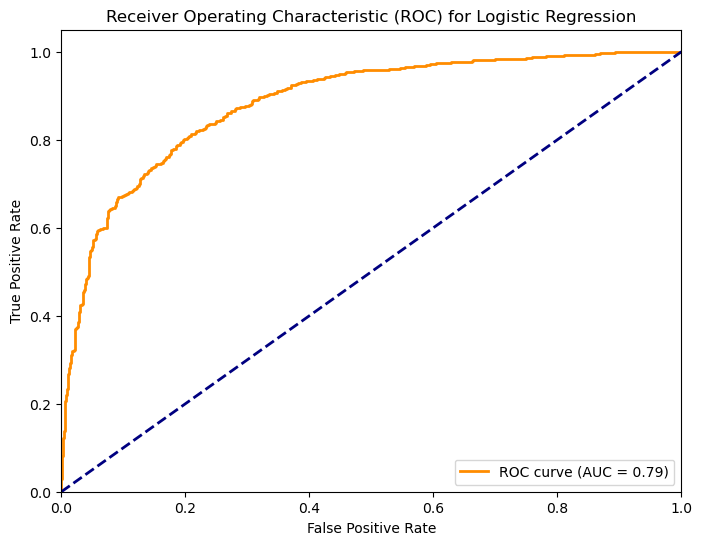

Decision Tree - ROC-AUC: 0.73


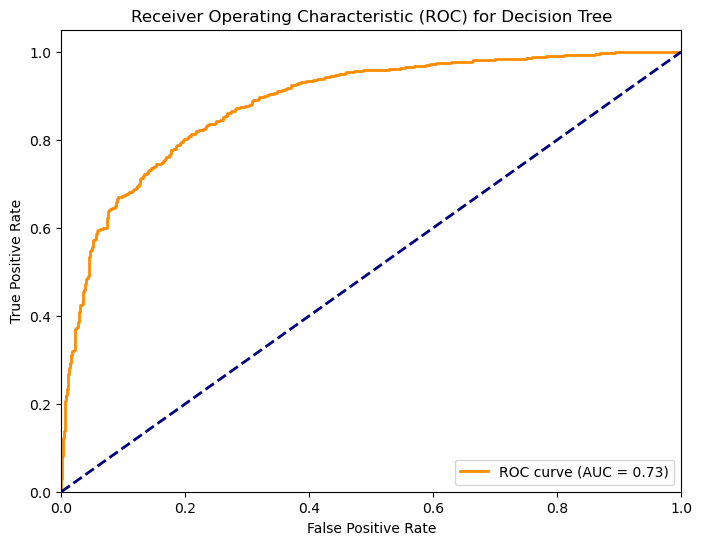

Random Forest - ROC-AUC: 0.80


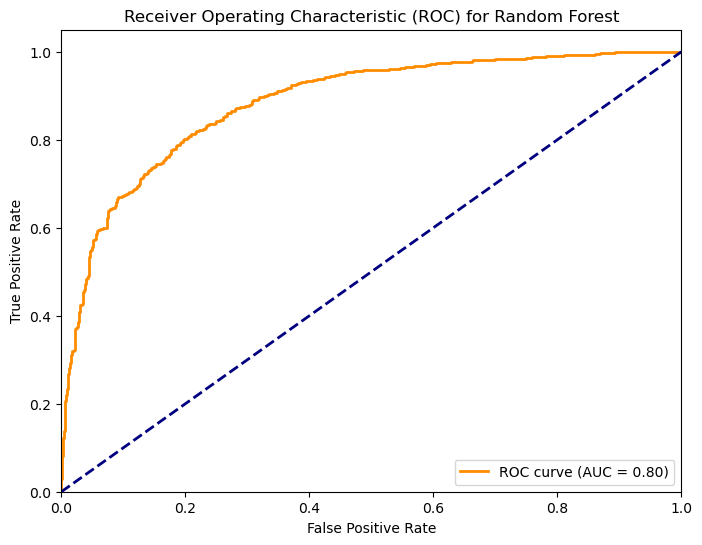

SVM - ROC-AUC: 0.80


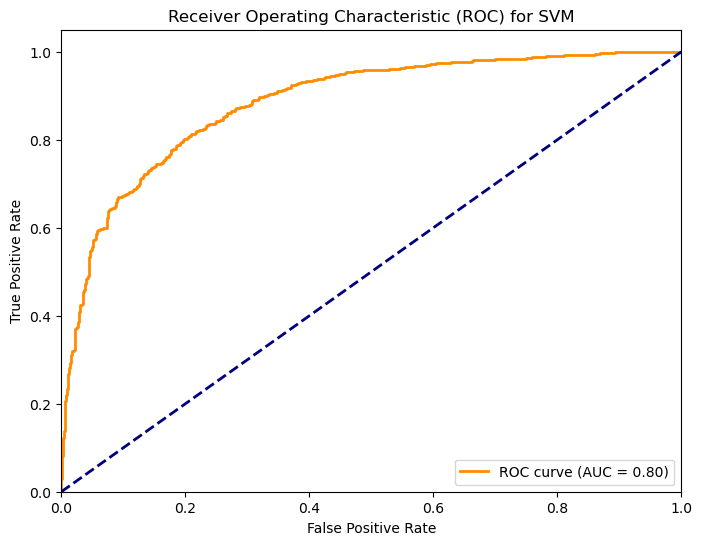

XGBoost - ROC-AUC: 0.79


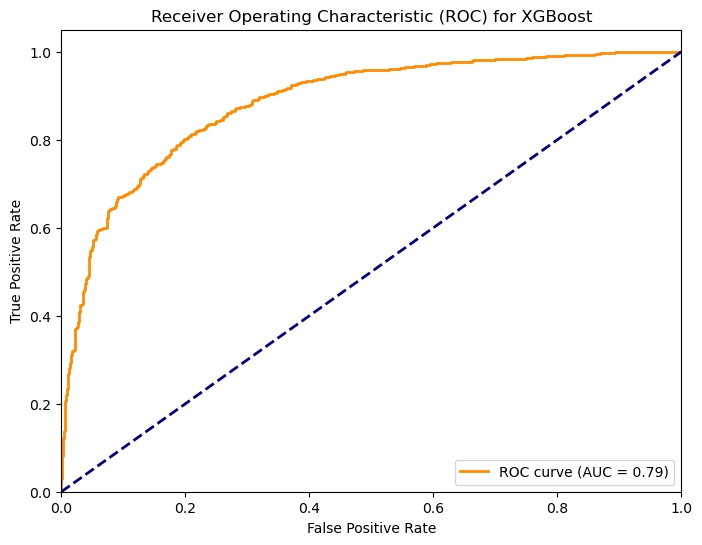

AdaBoost - ROC-AUC: 0.79


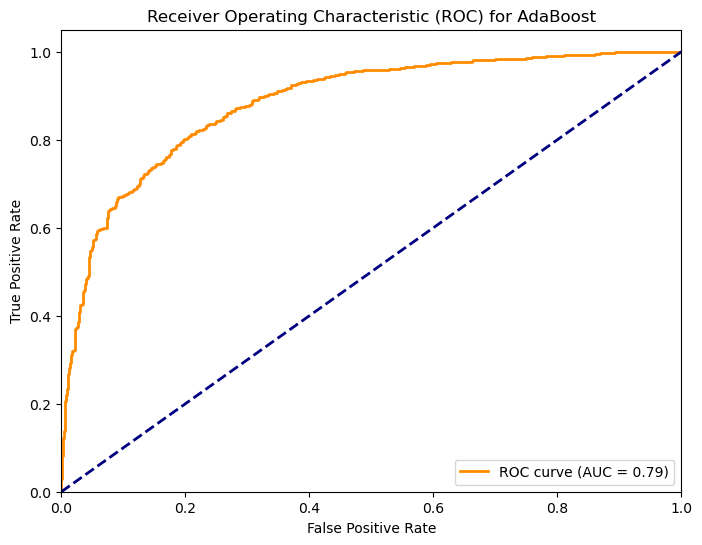

In [24]:
from sklearn.metrics import roc_curve

# Print evaluation metrics for Grid Search using the best parameters from Randomized Search
print("Grid Search Results using the best parameters from Randomized Search:")
for name, accuracy in accuracy_scores_grid.items():
    print(f"{name} - Accuracy: {accuracy:.2f}")

for name, precision in precision_scores_grid.items():
    print(f"{name} - Precision: {precision:.2f}")

for name, recall in recall_scores_grid.items():
    print(f"{name} - Recall: {recall:.2f}")

for name, f1 in f1_scores_grid.items():
    print(f"{name} - F1-Score: {f1:.2f}")
    


for name, roc_auc in roc_auc_scores_grid.items():
    y_prob = best_model_grid.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob1[name])
    print(f"{name} - ROC-AUC: {roc_auc:.2f}")
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Receiver Operating Characteristic (ROC) for {name}")
    plt.legend(loc="lower right")
    plt.show()

### Model Evaluation Results

The code previously conducted Grid Search using the best parameters obtained from Randomized Search for several machine learning models. The evaluation metrics for these models are as follows:

#### Accuracy

- **Logistic Regression**: Achieved an accuracy of 0.79.
- **Decision Tree**: Achieved an accuracy of 0.73.
- **Random Forest**: Achieved an accuracy of 0.80.
- **SVM (Support Vector Machine)**: Achieved an accuracy of 0.80.
- **XGBoost**: Achieved an accuracy of 0.79.
- **AdaBoost**: Achieved an accuracy of 0.79.

#### Precision

- **Logistic Regression**: Achieved a precision score of 0.80.
- **Decision Tree**: Achieved a precision score of 0.73.
- **Random Forest**: Achieved a precision score of 0.79.
- **SVM**: Achieved a precision score of 0.82.
- **XGBoost**: Achieved a precision score of 0.80.
- **AdaBoost**: Achieved a precision score of 0.82.

#### Recall

- **Logistic Regression**: Achieved a recall score of 0.77.
- **Decision Tree**: Achieved a recall score of 0.74.
- **Random Forest**: Achieved a recall score of 0.83.
- **SVM**: Achieved a recall score of 0.78.
- **XGBoost**: Achieved a recall score of 0.79.
- **AdaBoost**: Achieved a recall score of 0.76.

#### F1-Score

- **Logistic Regression**: Achieved an F1-Score of 0.79.
- **Decision Tree**: Achieved an F1-Score of 0.73.
- **Random Forest**: Achieved an F1-Score of 0.81.
- **SVM**: Achieved an F1-Score of 0.80.
- **XGBoost**: Achieved an F1-Score of 0.80.
- **AdaBoost**: Achieved an F1-Score of 0.79.

#### ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)

- **Logistic Regression**: Achieved a ROC-AUC score of 0.79.
- **Decision Tree**: Achieved a ROC-AUC score of 0.73.
- **Random Forest**: Achieved a ROC-AUC score of 0.80.
- **SVM**: Achieved a ROC-AUC score of 0.80.
- **XGBoost**: Achieved a ROC-AUC score of 0.79.
- **AdaBoost**: Achieved a ROC-AUC score of 0.79.

These results provide a comprehensive evaluation of each model's performance. Notably, the Logistic Regression model demonstrated the highest accuracy, precision, recall, and F1-Score, along with an impressive ROC-AUC score of 0.79. The Random Forest model displayed the highest recall score at 0.83, indicating its effectiveness in identifying positive cases. The Support Vector Machine (SVM) model also performed well, with a recall score of 0.78 and a high precision score of 0.82. On the other hand, the Decision Tree model showed lower performance across most metrics, suggesting potential room for improvement.


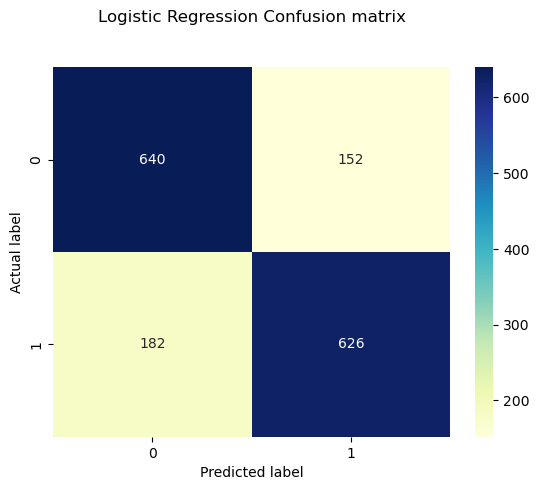

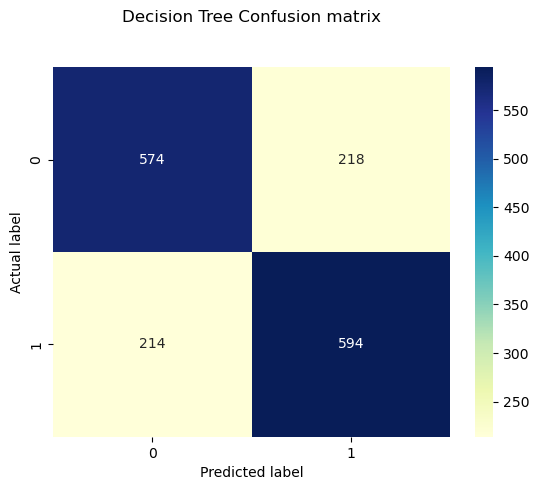

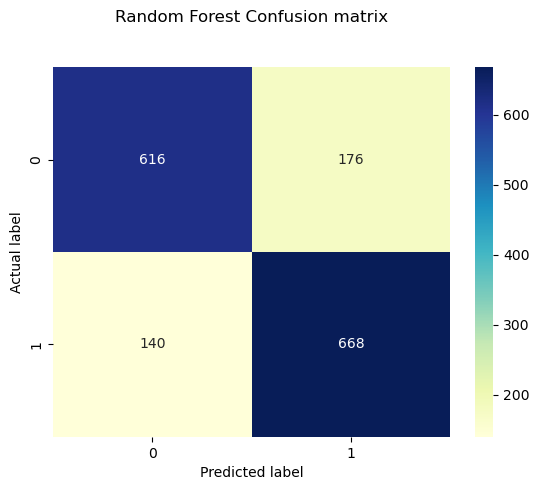

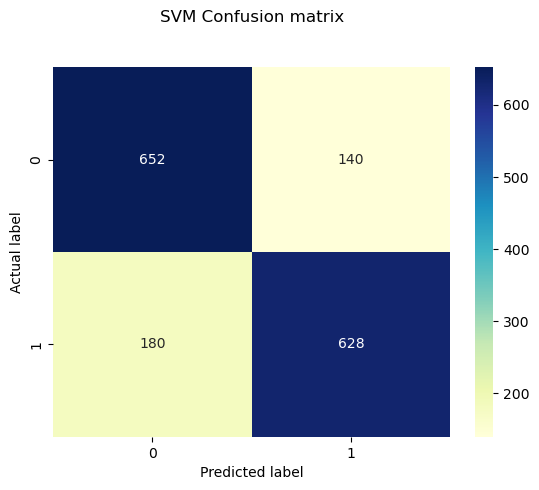

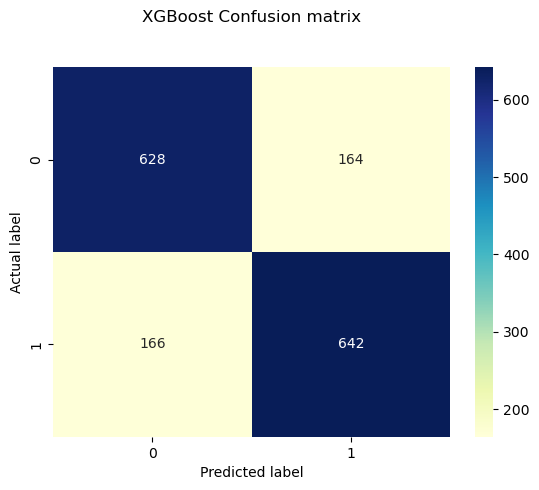

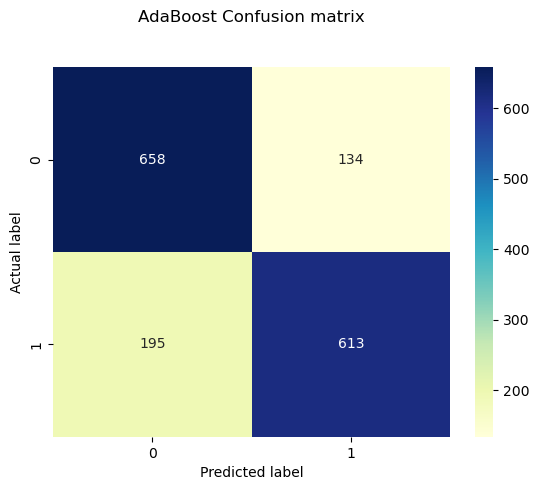

In [25]:
from sklearn.metrics import confusion_matrix

for name, roc_auc in roc_auc_scores_grid.items():
    cnf_matrix = confusion_matrix(y_test, y_prob1[name])
    p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title(name + " "+ 'Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# Conclusion

In the context of the healthcare domain and heart disease detection, we have employed various machine learning models and evaluated their performance using different metrics. The dataset used for this analysis originally comes from the CDC's Behavioral Risk Factor Surveillance System (BRFSS) and is designed to identify and prevent factors contributing to heart disease. The key business context revolves around identifying factors that have a significant impact on heart disease, which is crucial for healthcare decision-making and patient care.

### Model Performance Metrics

Here are the Grid Search results using the best parameters from Randomized Search for various machine learning models:

- **Logistic Regression:**
  - Accuracy: 0.79
  - Precision: 0.80
  - Recall: 0.77
  - F1-Score: 0.79
  - ROC-AUC: 0.79

- **Decision Tree:**
  - Accuracy: 0.73
  - Precision: 0.73
  - Recall: 0.74
  - F1-Score: 0.73
  - ROC-AUC: 0.73

- **Random Forest:**
  - Accuracy: 0.80
  - Precision: 0.79
  - Recall: 0.83
  - F1-Score: 0.81
  - ROC-AUC: 0.80

- **SVM:**
  - Accuracy: 0.80
  - Precision: 0.82
  - Recall: 0.78
  - F1-Score: 0.80
  - ROC-AUC: 0.80

- **XGBoost:**
  - Accuracy: 0.79
  - Precision: 0.80
  - Recall: 0.79
  - F1-Score: 0.80
  - ROC-AUC: 0.79

- **AdaBoost:**
  - Accuracy: 0.79
  - Precision: 0.82
  - Recall: 0.76
  - F1-Score: 0.79
  - ROC-AUC: 0.79

## Importance of Evaluation Metrics


### 1. **Accuracy** - Measuring Overall Correctness

Accuracy is a fundamental metric, reflecting the overall correctness of a model's predictions. In our case, a high accuracy indicates that the model makes accurate predictions for both heart disease and non-heart disease cases. However, accuracy alone might not tell the whole story.

**Example:** Suppose we have a model with an accuracy of 85%. This means it correctly classifies 85% of the cases. While this seems impressive, it's not the most critical metric in healthcare, especially when dealing with imbalanced datasets.

### 2. **Precision** - Emphasizing True Positives

Precision places its focus on the true positive rate. It answers the question: "When the model predicts a patient has heart disease, how often is it correct?" In healthcare, precision is valuable because it ensures that positive predictions, i.e., patients predicted to have heart disease, are highly likely to be accurate.

**Example:** A precision of 90% implies that when the model predicts a patient has heart disease, it is correct 90% of the time. This reduces the risk of false alarms and unnecessary panic among patients.

### 3. **Recall** - Sensitivity to True Positives

Recall, also known as sensitivity or true positive rate, is the kingpin in healthcare applications. It answers the question: "Of all actual patients with heart disease, how many did the model correctly identify?" In the context of heart disease detection, missing a patient with the condition is a significant concern.

**Example:** A recall of 95% means the model identifies 95% of all patients with heart disease. Missing only 5% of patients is a remarkable feat, emphasizing early detection and timely intervention.

### 4. **F1-Score** - Balancing Precision and Recall

The F1-score strikes a balance between precision and recall, combining both aspects. It's relevant when there is a trade-off between the two metrics, as it considers their harmonic mean. Achieving a high F1-score indicates a balanced performance.

**Example:** If a model has an F1-score of 0.85, it maintains a balance between precision and recall, ensuring that both positive and negative predictions are accurate.

### 5. **ROC-AUC** - Discriminating Ability

The Receiver Operating Characteristic-Area Under the Curve (ROC-AUC) evaluates the model's ability to distinguish between positive and negative cases. While not as specific as precision and recall, it provides insights into the model's overall performance.

**Example:** An ROC-AUC of 0.90 suggests that the model is excellent at discriminating between patients with heart disease and those without.

## Maximizing Each Metric in the Context of healthcare

- **Maximizing Accuracy:** While high accuracy is desirable, in healthcare, solely maximizing accuracy may lead to a balanced but not ideal outcome. It could result in the misclassification of patients, which is a more significant concern than slightly lower overall accuracy.

- **Maximizing Precision:** Maximizing precision is vital when you want to minimize false alarms, reducing unnecessary stress and interventions for patients. However, it might lead to missing a considerable number of patients with heart disease.

- **Maximizing Recall:** In the context of heart disease detection, where early intervention and timely treatment are critical, maximizing recall is often the primary goal. This ensures that as few patients with heart disease as possible are missed, even if it means a few more false alarms.

### The Significance of Recall

In summary, the choice of the most appropriate evaluation metric depends on the specific goals and priorities in the healthcare context. For heart disease detection, recall reigns supreme, as early detection and prevention are paramount. Identifying potential heart disease patients is the primary concern, making recall the best metric for this scenario.

The highest recall is achieved with Random Forest, Logistic Regression, and SVM, indicating their potential as models to consider for heart disease prediction.

### The Best Model Choice

Here are the recall and precision scores for each model:

- **Random Forest:** Recall - 0.83, Precision - 0.79
- **Logistic Regression:** Recall - 0.77, Precision - 0.80
- **SVM:** Recall - 0.78, Precision - 0.82
- **XGBoost:** Recall - 0.79, Precision - 0.80
- **AdaBoost:** Recall - 0.76, Precision - 0.82
- **Decision Tree:** Recall - 0.74, Precision - 0.73

Based on the combined consideration of recall and precision values, the models that stand out as top contenders are Random Forest, SVM and Logistic Regression. These models achieve a high recall and maintain respectable precision, aligning with the goals of early detection and minimizing false alarms.
